In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
import math
import requests
from datetime import datetime

In [2]:
stocks_dataset_full = pd.read_csv("sp500_companies.csv")
stocks_dataset_full

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NMS,CZR,"Caesars Entertainment, Inc.","Caesars Entertainment, Inc.",Consumer Cyclical,Resorts & Casinos,32.82,6973593600,3.668000e+09,-0.040,Reno,NV,United States,51000.0,"Caesars Entertainment, Inc. operates as a gami...",0.000125
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,31.88,6972155904,1.882000e+09,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000125
499,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,70.85,6697217024,6.731300e+08,-0.052,Greensboro,NC,United States,8700.0,"Qorvo, Inc. engages in development and commerc...",0.000120
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,50.15,6260525568,7.033000e+08,0.085,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000113


In [3]:
stocks_dataset_index = pd.read_csv("sp500_index.csv")
stocks_dataset_index

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
...,...,...
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08


In [4]:
stocks_dataset_stocks = pd.read_csv("sp500_stocks.csv")

In [5]:
# data from 2013 - 2018
dataset_5yr = pd.read_csv("all_stocks_5yr.csv")
dataset_5yr

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [6]:
dataset_5yr['date'] = pd.to_datetime(dataset_5yr['date'])
dataset_5yr.sort_values(by='date', inplace=True)
dataset_5yr

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.1200,14.630,14.75,8407500,AAL
508224,2013-02-08,81.22,81.9300,80.940,81.89,296853,SLG
506965,2013-02-08,78.24,79.0700,78.125,79.07,4632684,SLB
85755,2013-02-08,236.64,238.6924,235.750,238.16,552207,BLK
505706,2013-02-08,89.04,89.4800,88.910,89.16,554948,SJM
...,...,...,...,...,...,...,...
147509,2018-02-07,53.38,54.3600,52.940,52.97,6496219,CSX
31474,2018-02-07,107.46,109.4800,106.560,106.63,1668253,ALB
241494,2018-02-07,10.75,11.0400,10.700,10.76,68041787,F
42609,2018-02-07,176.25,180.9900,176.000,177.47,5715671,AMGN


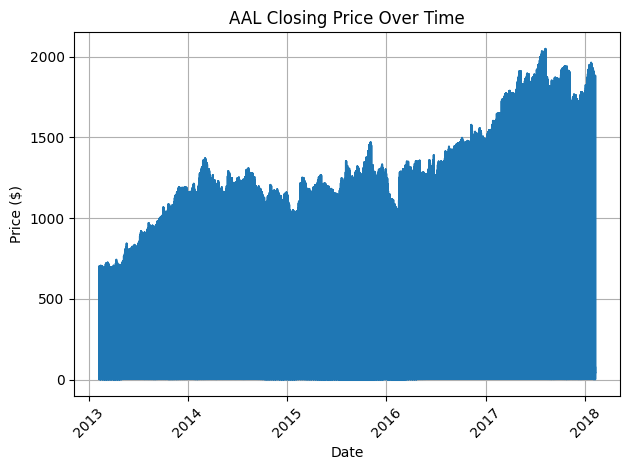

In [7]:
#Line Plot of Closing Price Over Time
plt.plot(dataset_5yr['date'], dataset_5yr['close'], label='close price')
plt.title('AAL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

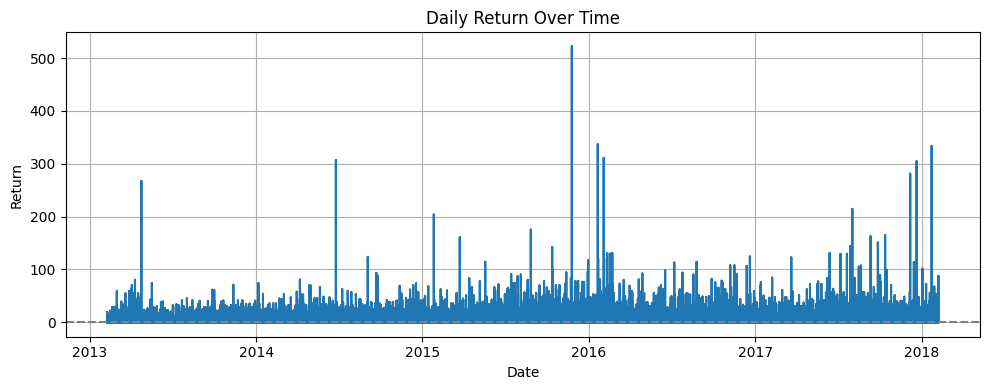

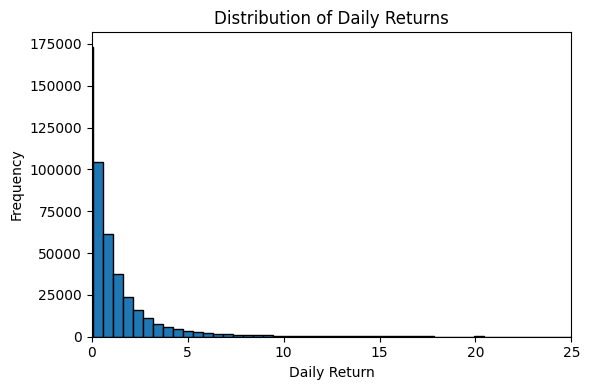

In [8]:
# Daily Returns + Histogram
dataset_5yr['daily_return'] = dataset_5yr['close'].pct_change()

# Line plot
plt.figure(figsize=(10, 4))
plt.plot(dataset_5yr['date'], dataset_5yr['daily_return'], label='Daily Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Daily Return Over Time')
plt.ylabel('Return')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(dataset_5yr['daily_return'].dropna(), bins=1000, edgecolor='black')
plt.xlim(0, 25)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

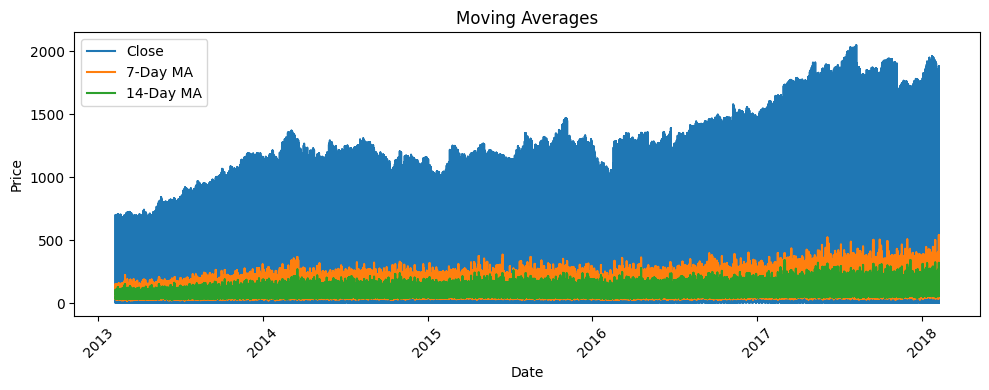

In [9]:
#Moving Averages (7-day and 14-day)

dataset_5yr['MA7'] = dataset_5yr['close'].rolling(window=7).mean()
dataset_5yr['MA14'] = dataset_5yr['close'].rolling(window=14).mean()

plt.figure(figsize=(10, 4))
plt.plot(dataset_5yr['date'], dataset_5yr['close'], label='Close')
plt.plot(dataset_5yr['date'], dataset_5yr['MA7'], label='7-Day MA')
plt.plot(dataset_5yr['date'], dataset_5yr['MA14'], label='14-Day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


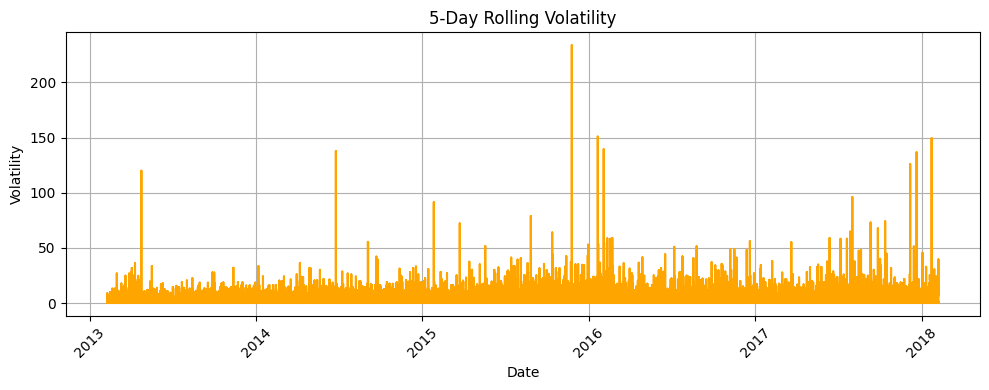

In [10]:
#Volatility (Rolling Std of Returns)

dataset_5yr['volatility'] = dataset_5yr['daily_return'].rolling(window=5).std()

plt.figure(figsize=(10, 4))
plt.plot(dataset_5yr['date'], dataset_5yr['volatility'], color='orange')
plt.title('5-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_154/3979076262.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


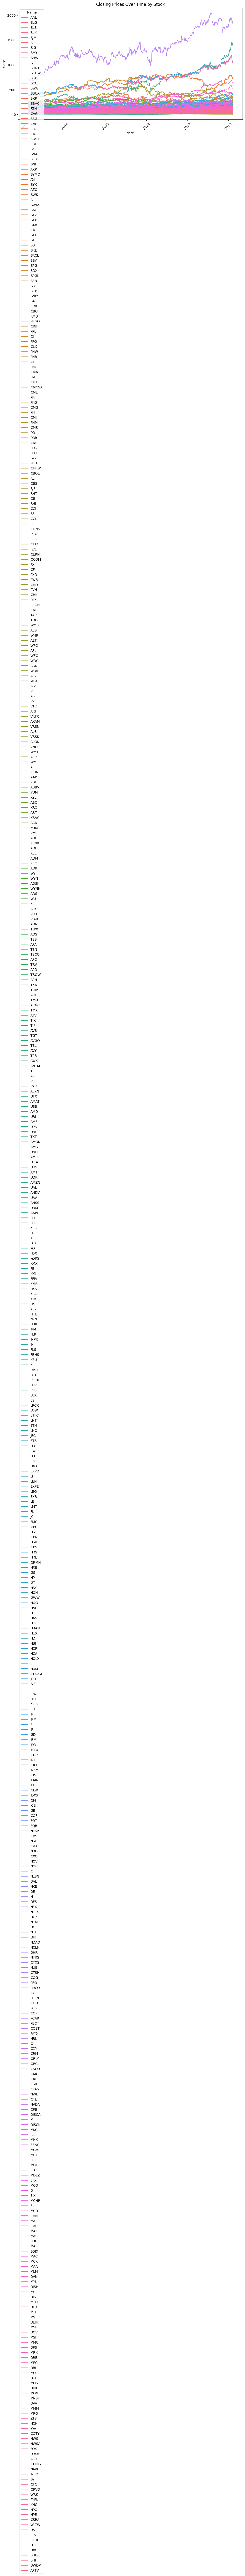

In [11]:
#Line Plot of Closing Prices by Stock

plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset_5yr, x='date', y='close', hue='Name')
plt.title('Closing Prices Over Time by Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

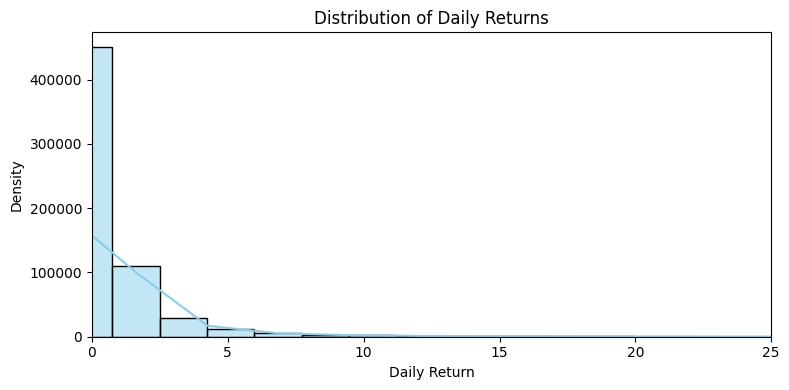

In [12]:
#Distribution of Daily Returns (with KDE Curve)

plt.figure(figsize=(8, 4))
plt.xlim(0, 25)
sns.histplot(dataset_5yr['daily_return'].dropna(), kde=True, bins=300, color='skyblue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [13]:
1. Sentences into vector embedding 
2. Find out which embedding lags are most correlated with future stock prices - december's sentiment for Feb
- When is it predicting the best
3. Plot sentiment over time 
4. How well does past sentiment predict future prices 
5. Grid based method to buy/sell

SyntaxError: unterminated string literal (detected at line 2) (3995257233.py, line 2)

In [7]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 112.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.3/187.3 kB 31.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp310-cp310-linux_x86_64.whl size=971099 sha256=1eb6488b2d0b8ce3cd70e17074ca0f5fb47b7dd3f056cca5db5d5aafbc1234cb
  Stored in directory: /root/.cache/pip/wheels/8d/c2/af/d591c26196f80ecdedb79664b51642ff1cf49af64d5cd69999
Successfully built peewee

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use upda

In [10]:
import yfinance as yf

sp500 = yf.download("^GSPC", start="2013-01-01", end="2025-04-23", interval="1d")
sp500.to_csv("sp500_historical_data_2013_2025.csv")


YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed


In [31]:
allstocks = pd.read_csv("sp500_historical_data_2013_2025.csv")
allstocks

,Price,Close,High,Low,Open,Volume
0,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN
2,2013-01-02,1462.4200439453125,1462.4300537109375,1426.18994140625,1426.18994140625,4202600000
3,2013-01-03,1459.3699951171875,1465.469970703125,1455.530029296875,1462.4200439453125,3829730000
4,2013-01-04,1466.469970703125,1467.93994140625,1458.989990234375,1459.3699951171875,3424290000
...,...,...,...,...,...,...
3092,2025-04-15,5396.6298828125,5450.41015625,5386.43994140625,5411.990234375,4317110000
3093,2025-04-16,5275.7001953125,5367.240234375,5220.7900390625,5335.75,4607750000
3094,2025-04-17,5282.7001953125,5328.31005859375,5255.580078125,5305.4501953125,4714880000
3095,2025-04-21,5158.2001953125,5232.93994140625,5101.6298828125,5232.93994140625,4226340000


In [34]:
allstocks = allstocks.drop([0, 1])
allstocks = allstocks.dropna() 
allstocks.rename(columns={"Price": "Date"})

,Date,Close,High,Low,Open,Volume
2,2013-01-02,1462.4200439453125,1462.4300537109375,1426.18994140625,1426.18994140625,4202600000
3,2013-01-03,1459.3699951171875,1465.469970703125,1455.530029296875,1462.4200439453125,3829730000
4,2013-01-04,1466.469970703125,1467.93994140625,1458.989990234375,1459.3699951171875,3424290000
5,2013-01-07,1461.8900146484375,1466.469970703125,1456.6199951171875,1466.469970703125,3304970000
6,2013-01-08,1457.1500244140625,1461.8900146484375,1451.6400146484375,1461.8900146484375,3601600000
...,...,...,...,...,...,...
3092,2025-04-15,5396.6298828125,5450.41015625,5386.43994140625,5411.990234375,4317110000
3093,2025-04-16,5275.7001953125,5367.240234375,5220.7900390625,5335.75,4607750000
3094,2025-04-17,5282.7001953125,5328.31005859375,5255.580078125,5305.4501953125,4714880000
3095,2025-04-21,5158.2001953125,5232.93994140625,5101.6298828125,5232.93994140625,4226340000


In [37]:
allstocks = allstocks.rename(columns={"Price": "Date"})
allstocks['Date'] = pd.to_datetime(allstocks['Date'])
allstocks.sort_values(by='Date', inplace=True)
allstocks['Close'] = allstocks['Close'].astype(float)
allstocks['High'] = allstocks['High'].astype(float)
allstocks['Low'] = allstocks['Low'].astype(float)
allstocks['Open'] = allstocks['Open'].astype(float)
allstocks['Volume'] = allstocks['Volume'].astype(float)
allstocks

,Date,Close,High,Low,Open,Volume
2,2013-01-02,1462.420044,1462.430054,1426.189941,1426.189941,4.202600e+09
3,2013-01-03,1459.369995,1465.469971,1455.530029,1462.420044,3.829730e+09
4,2013-01-04,1466.469971,1467.939941,1458.989990,1459.369995,3.424290e+09
5,2013-01-07,1461.890015,1466.469971,1456.619995,1466.469971,3.304970e+09
6,2013-01-08,1457.150024,1461.890015,1451.640015,1461.890015,3.601600e+09
...,...,...,...,...,...,...
3092,2025-04-15,5396.629883,5450.410156,5386.439941,5411.990234,4.317110e+09
3093,2025-04-16,5275.700195,5367.240234,5220.790039,5335.750000,4.607750e+09
3094,2025-04-17,5282.700195,5328.310059,5255.580078,5305.450195,4.714880e+09
3095,2025-04-21,5158.200195,5232.939941,5101.629883,5232.939941,4.226340e+09


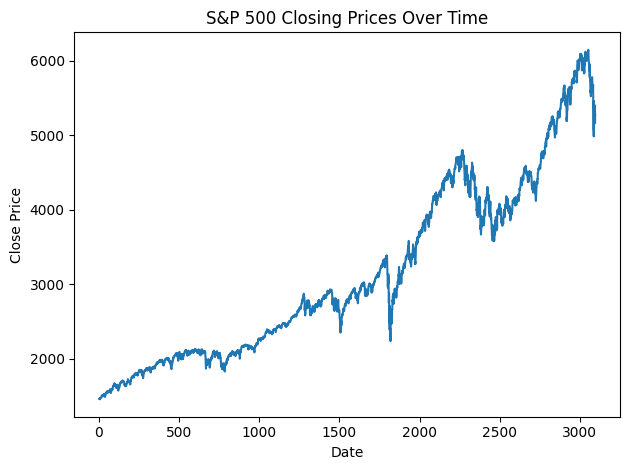

In [31]:
#Line Plot of Closing Prices by Stock

sns.lineplot(data=allstocks, x=allstocks.index, y="Close")
plt.title("S&P 500 Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

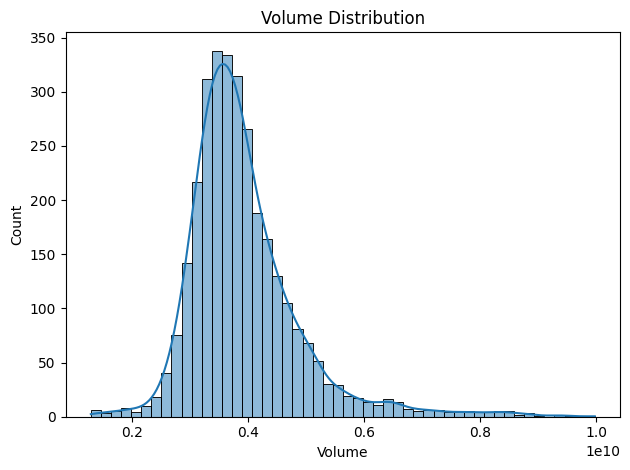

In [34]:
# Volume distribution
sns.histplot(allstocks['Volume'], bins=50, kde=True)
plt.title("Volume Distribution")
plt.xlabel("Volume")
plt.tight_layout()
plt.show()


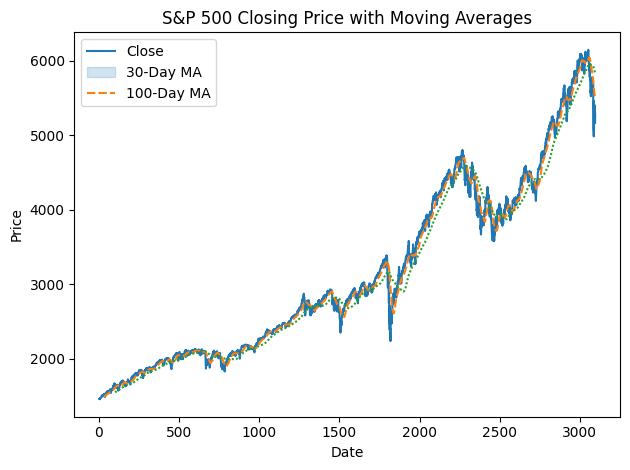

In [37]:
# Moving averages
allstocks['MA30'] = allstocks['Close'].rolling(window=30).mean()
allstocks['MA100'] = allstocks['Close'].rolling(window=100).mean()

sns.lineplot(data=allstocks[['Close', 'MA30', 'MA100']])
plt.title("S&P 500 Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Close', '30-Day MA', '100-Day MA'])
plt.tight_layout()
plt.show()


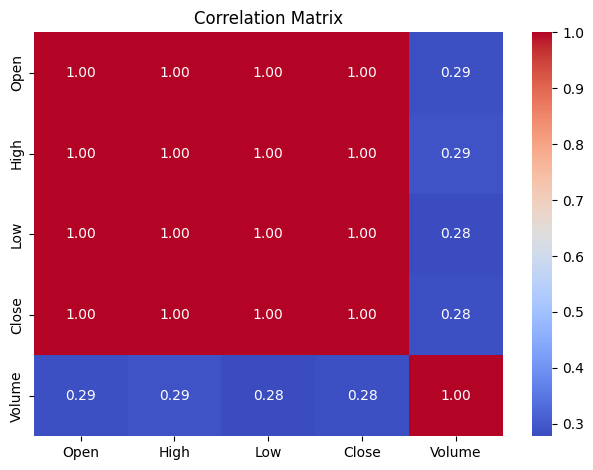

In [40]:
# correlation heatmap
corr = allstocks[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

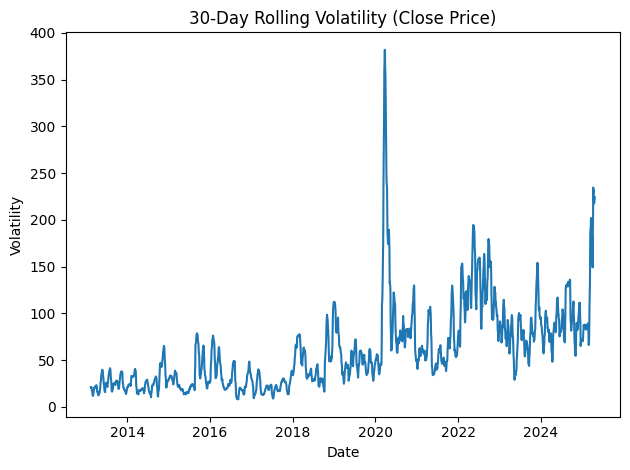

In [43]:
# Volatility
allstocks['Volatility_30'] = allstocks['Close'].rolling(window=30).std()

sns.lineplot(data=allstocks, x=allstocks['Date'], y="Volatility_30")
plt.title("30-Day Rolling Volatility (Close Price)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()

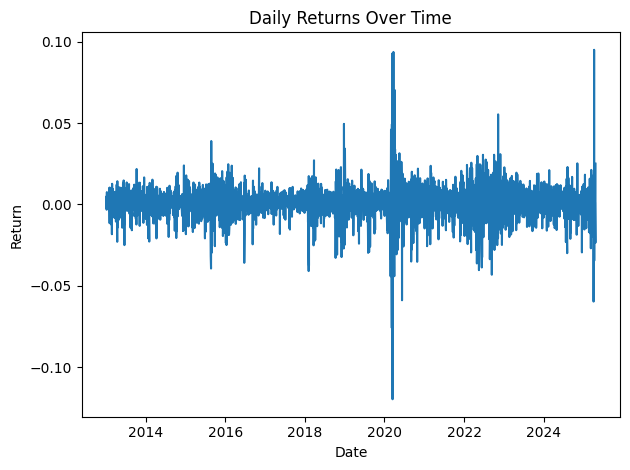

In [46]:
#Daily returns
allstocks['Daily_Return'] = allstocks['Close'].pct_change()

sns.lineplot(data=allstocks, x="Date", y='Daily_Return')
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return")
plt.tight_layout()
plt.show()
